# IGP 5 Models - Feature removal - Female Dataset

In [7]:
# load functions in python file with magic command
%run ../code/model.py

import pandas as pd
output_csv_path = '../output/'

#### Interpretation for next round (reduced feature models)

* `Gradient Boosting`
  * inactiveDay, inactiveLight, activeDark, std, percent_zero
  * [0, 2, 3, 5, 9] and [3, 5, 2, 9, 0]
* `SVC`
  * inactiveDay, inactiveLight, activeDark, activeNight, mean
  * [0, 1, 2, 3, 4]
* `XGBoost` 
  * inactiveLight, activeDark, activeNight, std, percentZero
  *  [1, 2, 3, 5, 7] and [7, 3, 5, 2, 9]
* `LightGBM`
  * inactiveDay, inactiveLight, activeDark, activeNight, std
  * [0, 1, 2, 3, 5] and [3, 2, 1, 5, 0]
* `Random Forest`
  * inactiveLight, activeDark, std, percent_zero, median
  * [2, 3, 5, 6, 9] and [3, 6, 9, 2, 4]

In [2]:
# read from csv
female_X_train = pd.read_csv(output_csv_path + 'female_X_train.csv')
female_y_train = pd.read_csv(output_csv_path + 'female_y_train.csv').iloc[:, 0]

In [4]:
# print column namees and idx
for i, col_name in enumerate(female_X_train.columns):
    print(f"Col: {col_name}, Colnum: {i}")


Col: inactiveDay, Colnum: 0
Col: activeNight, Colnum: 1
Col: inactiveLight, Colnum: 2
Col: activeDark, Colnum: 3
Col: mean, Colnum: 4
Col: std, Colnum: 5
Col: median, Colnum: 6
Col: q1, Colnum: 7
Col: q3, Colnum: 8
Col: percent_zero, Colnum: 9
Col: kurtosis, Colnum: 10


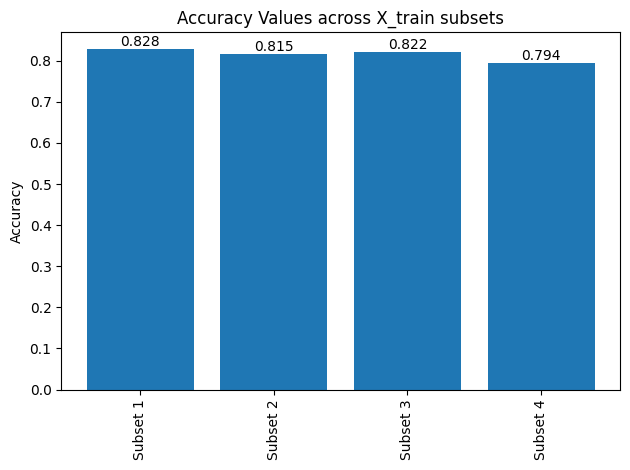

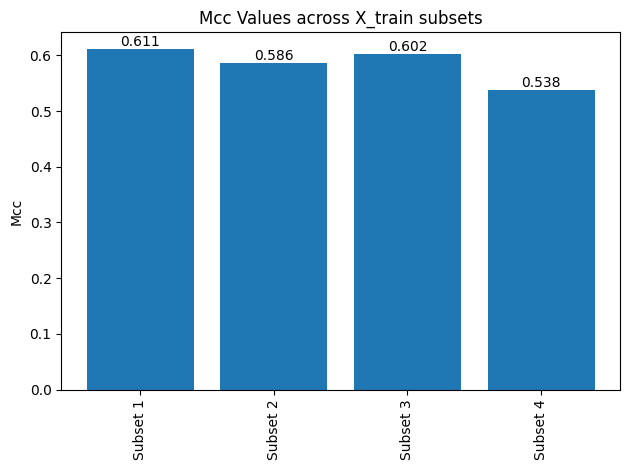

In [14]:
# RF [2, 3, 5, 6, 9] and [3, 6, 9, 2, 4]
rf_col1 = [2,3,5]
rf_col2 = [2,3,6]
rf_col3 = [2,3,9]
rf_col4 = [3,6,9]

rf1 = keep_columns(female_X_train, rf_col1)
rf2 = keep_columns(female_X_train, rf_col2)
rf3 = keep_columns(female_X_train, rf_col3)
rf4 = keep_columns(female_X_train, rf_col4)

rf = [('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE))]

rf1_female = evaluate_models(rf, rf1, female_y_train)
rf2_female = evaluate_models(rf, rf2, female_y_train)
rf3_female = evaluate_models(rf, rf3, female_y_train)
rf4_female = evaluate_models(rf, rf4, female_y_train)

rf_dict = [rf1_female, rf2_female, rf3_female, rf4_female]
plot_metric_dicts(rf_dict, "accuracy")
plot_metric_dicts(rf_dict, "mcc")

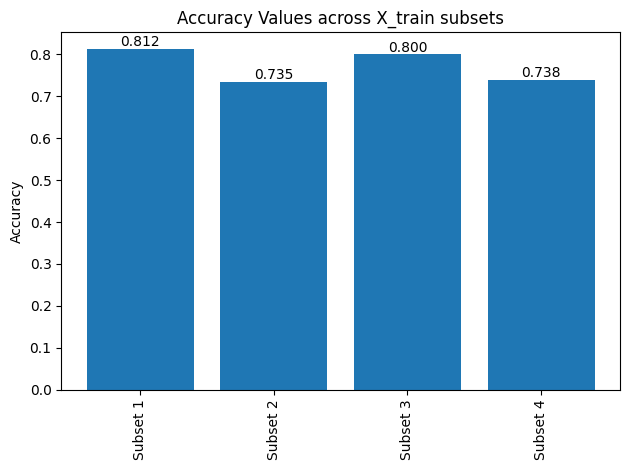

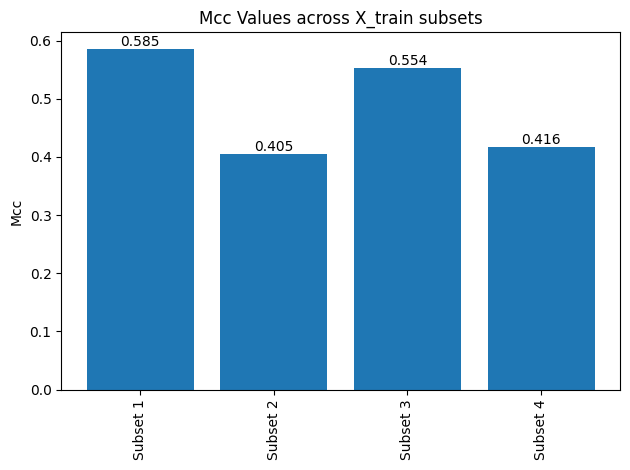

In [13]:
# lgbm [0, 1, 2, 3, 5] and [3, 2, 1, 5, 0]
lgbm_col1 = [2,3,5]
lgbm_col2 = [0,1,5]
lgbm_col3 = [1,2,3]
lgbm_col4 = [0,1,2]

lgbm1 = keep_columns(female_X_train, lgbm_col1)
lgbm2 = keep_columns(female_X_train, lgbm_col2)
lgbm3 = keep_columns(female_X_train, lgbm_col3)
lgbm4 = keep_columns(female_X_train, lgbm_col4)

lgbm = [('LightGBM', LGBMClassifier(verbose=-1, random_state=RANDOM_STATE))]

lgbm1_female = evaluate_models(lgbm, lgbm1, female_y_train)
lgbm2_female = evaluate_models(lgbm, lgbm2, female_y_train)
lgbm3_female = evaluate_models(lgbm, lgbm3, female_y_train)
lgbm4_female = evaluate_models(lgbm, lgbm4, female_y_train)

lgbm_dict = [lgbm1_female, lgbm2_female, lgbm3_female, lgbm4_female]
plot_metric_dicts(lgbm_dict, "accuracy")
plot_metric_dicts(lgbm_dict, "mcc")

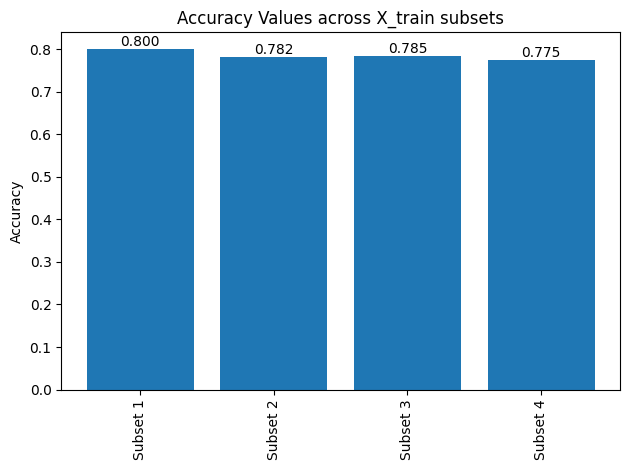

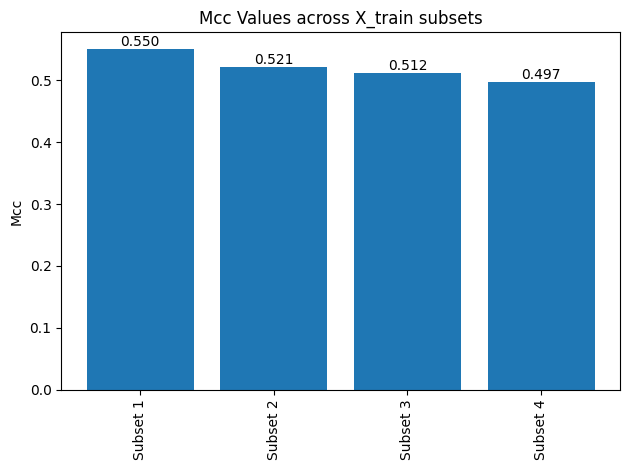

In [11]:
# xgboost [1, 2, 3, 5, 7] and [7, 3, 5, 2, 9]
xgb_col1 = [2,3,5]
xgb_col2 = [2,3,7]
xgb_col3 = [7,3,5]
xgb_col4 = [1,2,5]

xgb1 = keep_columns(female_X_train, xgb_col1)
xgb2 = keep_columns(female_X_train, xgb_col2)
xgb3 = keep_columns(female_X_train, xgb_col3)
xgb4 = keep_columns(female_X_train, xgb_col4)

xgb = [('XGBoost', XGBClassifier(random_state=RANDOM_STATE))]

xgb1_female = evaluate_models(xgb, xgb1, female_y_train)
xgb2_female = evaluate_models(xgb, xgb2, female_y_train)
xgb3_female = evaluate_models(xgb, xgb3, female_y_train)
xgb4_female = evaluate_models(xgb, xgb4, female_y_train)

xgb_dict = [xgb1_female, xgb2_female, xgb3_female, xgb4_female]
plot_metric_dicts(xgb_dict, "accuracy")
plot_metric_dicts(xgb_dict, "mcc")

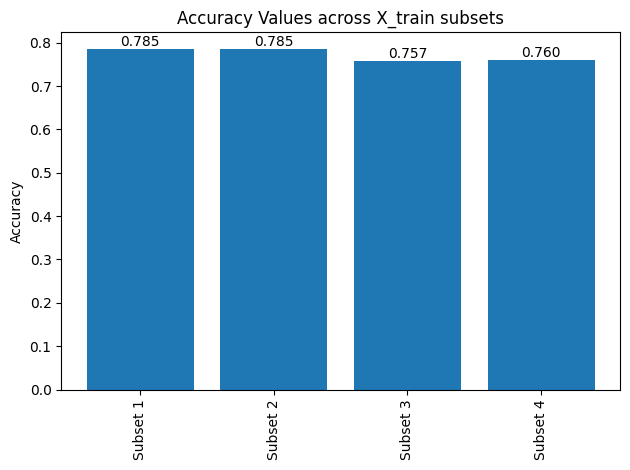

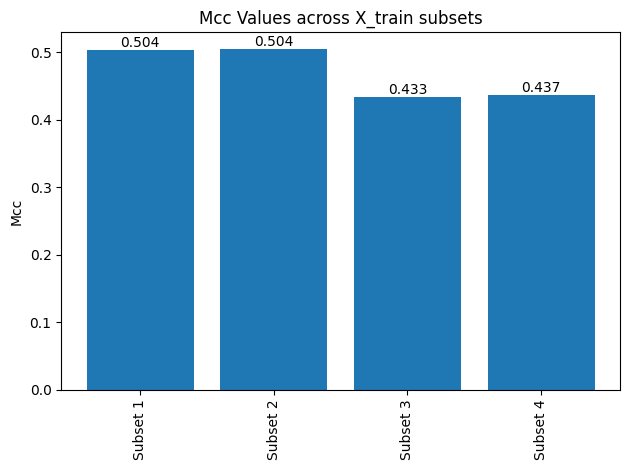

In [10]:
# svc [0, 1, 2, 3, 4]
svc_col1 = [2,3,5]
svc_col2 = [2,3,9]
svc_col3 = [0,1,5]
svc_col4 = [0,1,9]

svc1 = keep_columns(female_X_train, svc_col1)
svc2 = keep_columns(female_X_train, svc_col2)
svc3 = keep_columns(female_X_train, svc_col3)
svc4 = keep_columns(female_X_train, svc_col4)

svc = [('SVC linear', LinearSVC(dual=False, max_iter=10000, random_state=RANDOM_STATE))]

svc1_female = evaluate_models(svc, svc1, female_y_train)
svc2_female = evaluate_models(svc, svc2, female_y_train)
svc3_female = evaluate_models(svc, svc3, female_y_train)
svc4_female = evaluate_models(svc, svc4, female_y_train)

svc_dict = [svc1_female, svc2_female, svc3_female, svc4_female]
plot_metric_dicts(svc_dict, "accuracy")
plot_metric_dicts(svc_dict, "mcc")

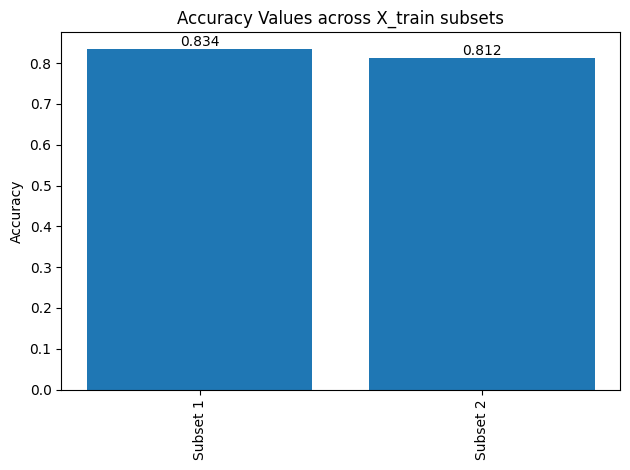

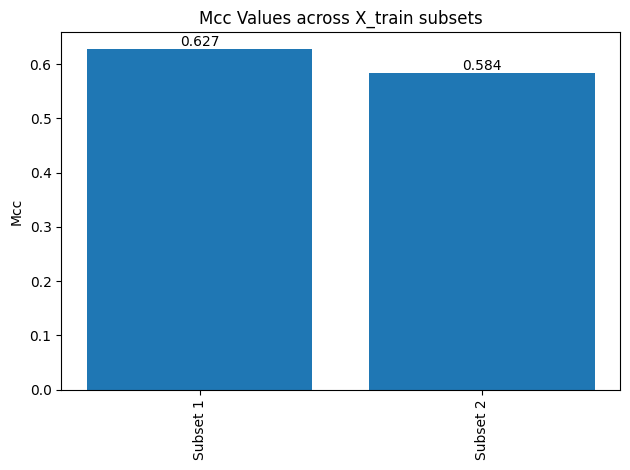

In [8]:
# gb [0, 2, 3, 5, 9] and [3, 5, 2, 9, 0]
gb_col1 = [2,3,5]
gb_col2 = [2,3,9]

gb1 = keep_columns(female_X_train, gb_col1)
gb2 = keep_columns(female_X_train, gb_col2)

gb = [('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_STATE))]

gb1_female = evaluate_models(gb, gb1, female_y_train)
gb2_female = evaluate_models(gb, gb2, female_y_train)


gb_dict = [gb1_female, gb2_female]
plot_metric_dicts(gb_dict, "accuracy")
plot_metric_dicts(gb_dict, "mcc")

## Comparison

**Random Forest**
* Subset 1 (`inactiveLight`, `activeDark`, `std`)
  * Accuracy = 0.828
  * MCC = 0.611

**LGBM**
* Subset 1 (`inactiveLight`, `activeDark`, `std`)
  * Accuracy = 0.812
  * MCC = 0.585

**XGBoost**
* Subset 1 (`inactiveLight`, `activeDark`, `std`)
  * Accuracy = 0.800
  * MCC = 0.550

**SVC**
* Subset 1 (`inactiveLight`, `activeDark`, `std`) and 2 (`inactiveLight`, `activeDark`, `percent_zero`)
  * Accuracy = 0.785
  * MCC = 0.504

**Gradient Boosting**
* Subset 1 (`inactiveLight`, `activeDark`, `std`)
  * Accuracy = 0.834
  * MCC = 0.627



## Results

* **Gradient Boosting** is going to the final model for hyperparameter tuning.
  * Accuracy = 0.834
  * MCC = 0.504
* Slight drop in accuracy from best out-of-box model with all features (Gradient Boosting, acc = 0.862, MCC=0.689)
* Features: (`inactiveLight`, `activeDark`, `std`)